In [1]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Graph plot
from scipy import stats
from datetime import datetime
import re
import random
from math import sqrt

# For training ML models to predict data
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading Training Data

# Referred: https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame
p = 0.3 # Read only 30% of the data
train_df = pd.read_csv('./input/train.csv', 
                       header=0, 
                       skiprows = lambda i: i>0 and random.random() > p)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


-------------Visualizing Data before any operation-------------

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1.662586e+07      1.662586e+07     1.662586e+07       1.662575e+07   
mean   1.134374e+01     -7.251063e+01     3.992314e+01      -7.251297e+01   
std    1.799155e+01      1.256615e+01     9.080394e+00       1.250544e+01   
min   -1.760000e+02     -3.426609e+03    -3.492264e+03      -3.426601e+03   
25%    6.000000e+00     -7.399207e+01     4.073493e+01      -7.399140e+01   
50%    8.500000e+00     -7.398181e+01     4.075265e+01      -7.398015e+01   
75%    1.250000e+01     -7.396709e+01     4.076713e+01      -7.396367e+01   
max    6.155086e+04      3.456213e+03     3.376602e+03       3.445035e+03   

       dropoff_latitude  passenger_count  
count      1.662575e+07     1.662586e+07  
mean       3.992141e+01     1.685453e+00  
std        9.312367e+00     1.328173e+00  
min       -3.488026e+03     0.000000e+00  
25%        4.073404e+01  

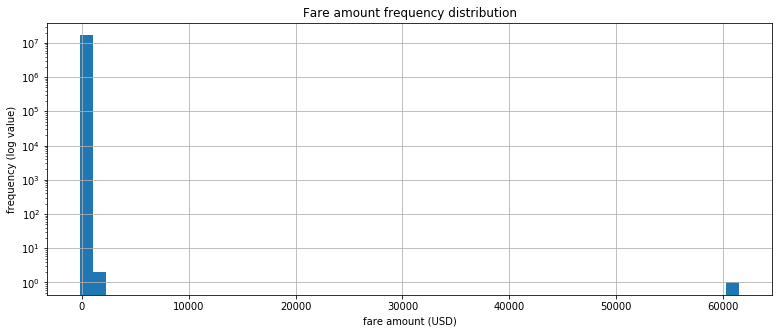

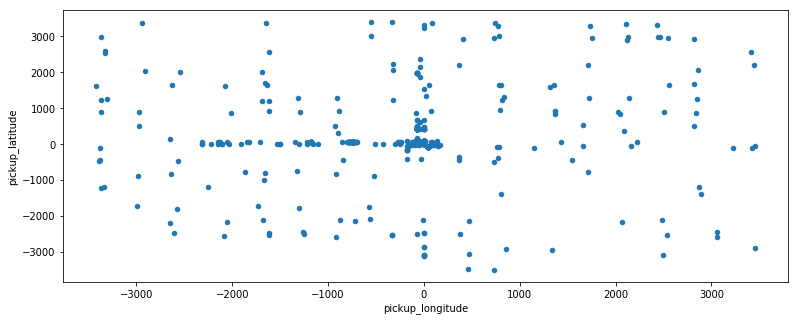

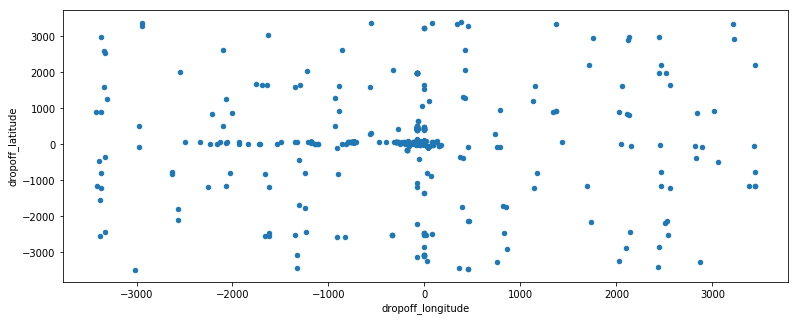

In [3]:
# Data Visualization before cleaning/transforming

# Fare amount frequency distribution
def plot_fare_frequency_dist(df):
    df.fare_amount.hist(log = True, bins = 50, figsize = (13,5))
    plt.ylabel('frequency (log value)')
    plt.xlabel('fare amount (USD)')
    plt.title('Fare amount frequency distribution')
    plt.show()

# Scatter Plot of Pickup Latitude and Longitude
def plot_pickup_latitude_longitude(df):
    plot = df.plot.scatter('pickup_longitude', 'pickup_latitude', figsize = (13,5))

# Scatter Plot of Dropoff Latitude and Longitude
def plot_dropoff_latitude_longitude(df):
    plot = df.plot.scatter('dropoff_longitude', 'dropoff_latitude', figsize = (13,5))

print("\n-------------Visualizing Data before any operation-------------\n")
print(train_df.describe())
plot_fare_frequency_dist(train_df)
plot_pickup_latitude_longitude(train_df)
plot_dropoff_latitude_longitude(train_df)

In [3]:
# Dropping Rows with NA values
def drop_na_rows(df):
    print(df.isnull().sum())
    return df.dropna(how = 'any', axis = 'rows')

# Removing rows with negative fare amount
def remove_negative_fare_amount_rows(df):
    return df[(df['fare_amount'] > 0)]
    
# Removing rows with fare amount not in range
def remove_rows_fare_amount_not_in_range(df):
    return df[(df['fare_amount'] > 2) & (df['fare_amount'] < 100)]

# Cleaning data based on fare amount
def clean_fare_amount(df):
    return df.pipe(remove_negative_fare_amount_rows).pipe(remove_rows_fare_amount_not_in_range)

# Removing rows with latitude and longitude not in range
def remove_rows_latitude_longitude_not_in_range(df):
    MAX_LONGITUDE = -72.586532
    MIN_LONGITUDE = -74.663242

    MAX_LATITUDE = 41.959555
    MIN_LATITUDE = 40.168973,

    df = df[(MIN_LONGITUDE <= df.dropoff_longitude) &(df.dropoff_longitude <= MAX_LONGITUDE)
            & (MIN_LONGITUDE <= df.pickup_longitude) &(df.pickup_longitude <= MAX_LONGITUDE)
            & (MIN_LATITUDE <= df.dropoff_latitude) & (df.dropoff_latitude <= MAX_LATITUDE)
            & (MIN_LATITUDE <= df.pickup_latitude) & (df.pickup_latitude <= MAX_LATITUDE)]
    
    return df

# Cleaning data based on latitude and longitude
def clean_latitude_longitude(df):
    return df.pipe(remove_rows_latitude_longitude_not_in_range)

# Removing rows with passenger count not in range
def remove_rows_passenger_count_not_in_range(df):
    return df[(df.passenger_count > 0) & (df.passenger_count < 7)]

# Cleaning passenger count data
def clean_passenger_count(df):
    df = remove_rows_passenger_count_not_in_range(df)
    return df

# Cleaning the data
def clean_data(df):

    old_size = len(df)
    df = drop_na_rows(df)
    new_size = len(df)
    print('Dropped NA rows. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    old_size = new_size
    df = clean_fare_amount(df)
    new_size = len(df)
    print('Cleaned data for fare amount. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    old_size = new_size
    df = clean_latitude_longitude(df)
    new_size = len(df)
    print('Cleaned data for latitude and longitude. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    old_size = new_size
    df = clean_passenger_count(df)
    new_size = len(df)
    print('Cleaned data for passenger count. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    return df

train_df = clean_data(train_df)

# print("\n-------------Visualizing Data after cleaning-------------\n")
# print(train_df.describe())
# plot_fare_frequency_dist(train_df)
# plot_pickup_latitude_longitude(train_df)
# plot_dropoff_latitude_longitude(train_df)

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    121
dropoff_latitude     121
passenger_count        0
dtype: int64
Dropped NA rows. New size: 16625661 Total Rows removed: 121
Cleaned data for fare amount. New size: 16617427 Total Rows removed: 8234
Cleaned data for latitude and longitude. New size: 16268499 Total Rows removed: 348928
Cleaned data for passenger count. New size: 16211373 Total Rows removed: 57126


In [4]:
# Eucledian distance based on haversine
# Referred: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
def haversine_distance(lon1, lat1, lon2, lat2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a)) #2*R*asin...

# Adding eucledian distance feature
def add_eucledian_distance(df):
    df['eucledian_distance'] = haversine_distance(df.dropoff_longitude, df.dropoff_latitude, 
                                                  df.pickup_longitude, df.pickup_latitude)

date_regex = re.compile('([0-9]{4})-([0-9]{2})-([0-9]{2}) ([0-9]{2}):([0-9]{2}):([0-9]{2})(.*)')    

def pickup_datetime_parser(x):
    m = date_regex.search(x)
    return datetime(int(m.group(1)), int(m.group(2)), int(m.group(3)), int(m.group(4)), int(m.group(5)), int(m.group(6)))

# Adding new feature of related to time
def add_time_feature(df):
    df['pickup_datetime_obj'] = df.pickup_datetime.apply(pickup_datetime_parser)
    df['year'] = df.pickup_datetime_obj.apply(lambda x: x.year)
    df['month'] = df.pickup_datetime_obj.apply(lambda x: x.month)
    df['weekday'] = df.pickup_datetime_obj.apply(lambda x: x.isoweekday())
    df['hour'] = df.pickup_datetime_obj.apply(lambda x: x.hour)
    df['minute'] = df.pickup_datetime_obj.apply(lambda x: (x.hour * 60) + x.minute)
    
    return df

# Referred: https://www.kaggle.com/dster/nyc-taxi-fare-starter-kernel-simple-linear-model/notebook
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
    return df
    
# Transforming data
def transform_data(df):
    old_size = len(df)
    add_eucledian_distance(df)
    new_size = len(df)
    print('Added eucledian distance feature. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    old_size = new_size
    df = add_time_feature(df)
    new_size = len(df)
    print('Added time related features. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    old_size = new_size
    df = add_travel_vector_features(df)
    new_size = len(df)
    print('Added travel vector features. New size: %d Total Rows removed: %d' % (new_size, old_size - new_size))
    
    return df

train_df = transform_data(train_df)

Added eucledian distance feature. New size: 16211373 Total Rows removed: 0
Added time related features. New size: 16211373 Total Rows removed: 0
Added travel vector features. New size: 16211373 Total Rows removed: 0



-------------Visualizing Data after transforming-------------



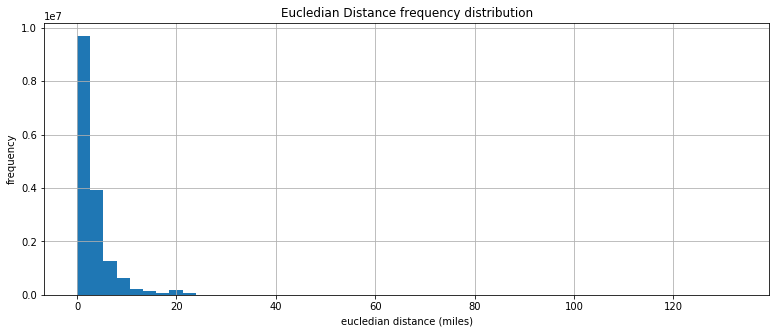

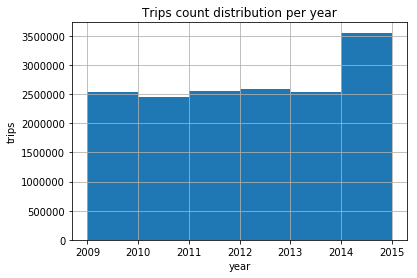

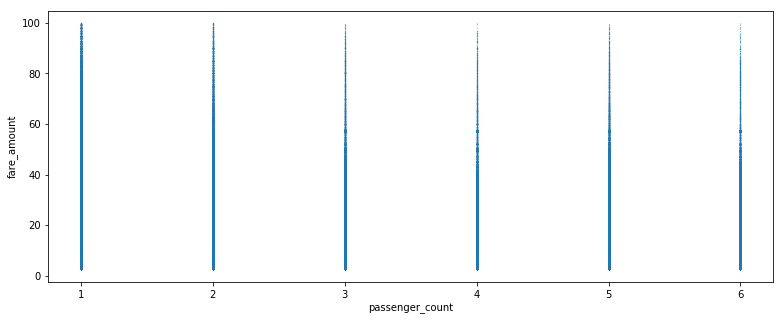

In [6]:
# eucledian distance frequency distribution plot
def plot_eucledian_distance_dist(df):
    df.eucledian_distance.hist(bins = 50, figsize = (13,5))
    plt.ylabel('frequency')
    plt.xlabel('eucledian distance (miles)')
    plt.title('Eucledian Distance frequency distribution')
    plt.show()

# Scatter Plot of Fare Amount and Passenger Count
def plot_fare_passenger_count(df):
    plot = df.plot.scatter('passenger_count', 'fare_amount', figsize = (13,5), s = 0.01)
    plt.show()

# trips count distribution based on year
def plot_trips_year_dist(df):
    df.year.hist(bins = 6)
    plt.ylabel('trips')
    plt.xlabel('year')
    plt.title('Trips count distribution per year')
    plt.show()

print("\n-------------Visualizing Data after transforming-------------\n")
plot_eucledian_distance_dist(train_df)
plot_trips_year_dist(train_df)
plot_fare_passenger_count(train_df)

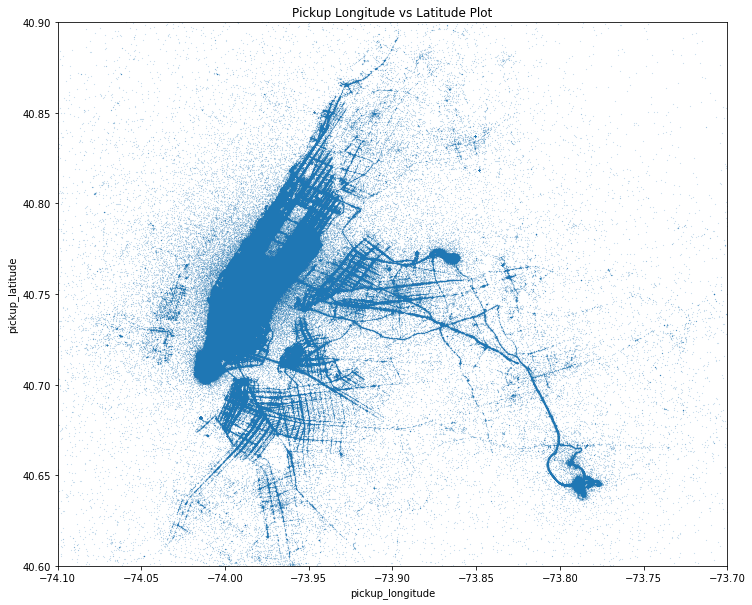

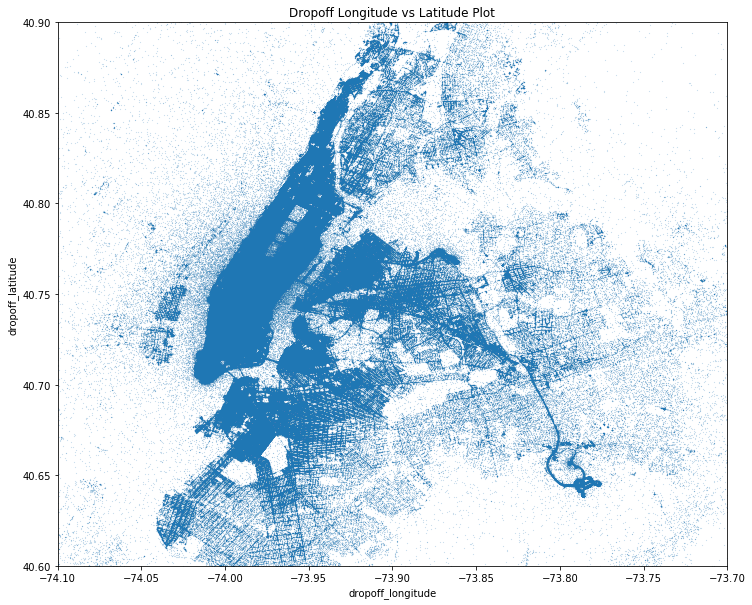

In [14]:
# Referred: https://github.com/llSourcell/kaggle_challenge/blob/master/notebook.ipynb
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.title('Pickup Longitude vs Latitude Plot')
ax.scatter(train_df['pickup_longitude'], train_df['pickup_latitude'], s = 0.007, alpha = 1)
plt.show()

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.title('Dropoff Longitude vs Latitude Plot')
ax.scatter(train_df['dropoff_longitude'], train_df['dropoff_latitude'], s = 0.007, alpha = 1)
plt.show()

Pearson coefficient between eucledian distance and fare amount is : 0.833292
Pearson coefficient between hour and fare amount is : -0.016893
Pearson coefficient between hour and eucledian distance is : -0.027053
Pearson coefficient between minute and fare amount is : -0.017222
Pearson coefficient between minute and eucledian distance is : -0.027323
Pearson coefficient between passenger_count and fare_amount is : 0.014768


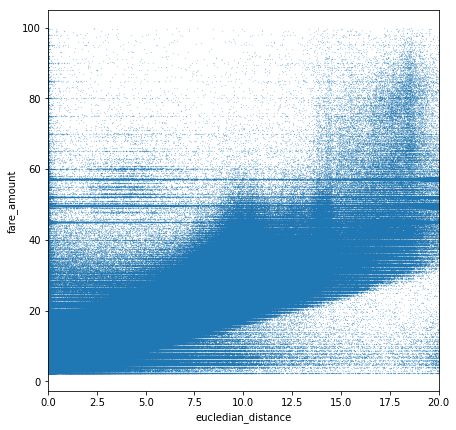

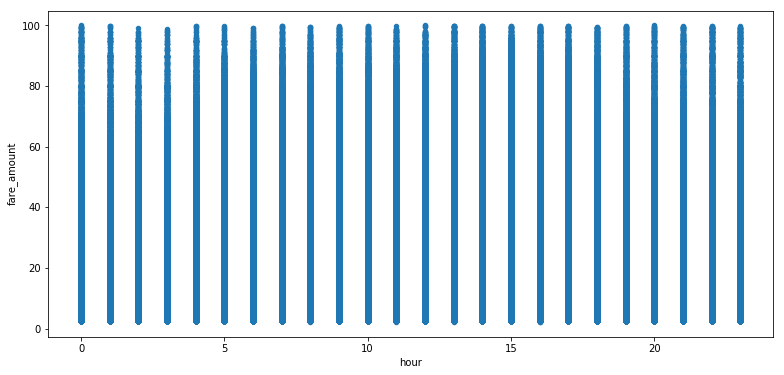

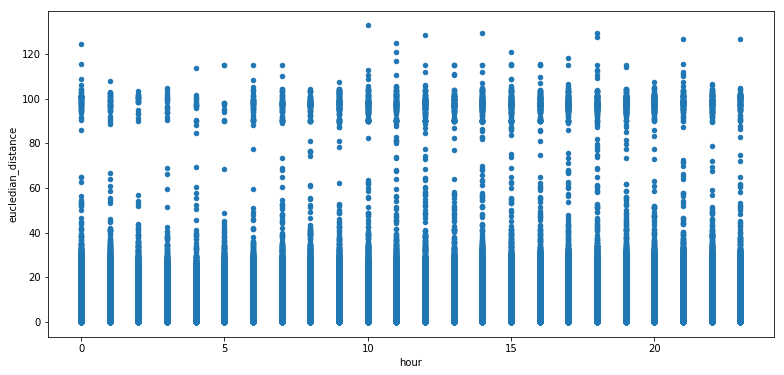

In [8]:
# Pearson Coefficient calculation
def pearson_coefficient(df):
    pearson_coefficient = stats.pearsonr(train_df['eucledian_distance'], train_df['fare_amount'])
    print("Pearson coefficient between eucledian distance and fare amount is : %f" % pearson_coefficient[0]);
    
    pearson_coefficient = stats.pearsonr(train_df['hour'], train_df['fare_amount'])
    print("Pearson coefficient between hour and fare amount is : %f" % pearson_coefficient[0]);
    
    pearson_coefficient = stats.pearsonr(train_df['hour'], train_df['eucledian_distance'])
    print("Pearson coefficient between hour and eucledian distance is : %f" % pearson_coefficient[0]);
    
    pearson_coefficient = stats.pearsonr(train_df['minute'], train_df['fare_amount'])
    print("Pearson coefficient between minute and fare amount is : %f" % pearson_coefficient[0]);
    
    pearson_coefficient = stats.pearsonr(train_df['minute'], train_df['eucledian_distance'])
    print("Pearson coefficient between minute and eucledian distance is : %f" % pearson_coefficient[0]);
    
    pearson_coefficient = stats.pearsonr(train_df['passenger_count'], train_df['fare_amount'])
    print("Pearson coefficient between passenger_count and fare_amount is : %f" % pearson_coefficient[0]);

pearson_coefficient(train_df)

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (7,7))
plt.xlim(0,20)
plt.xlabel('eucledian_distance')
plt.ylabel('fare_amount')
ax.scatter(train_df['eucledian_distance'], train_df['fare_amount'], s = 0.01, alpha = 1)
plt.show()

plot = train_df.plot.scatter('hour', 'fare_amount', figsize = (13,6))
plot = train_df.plot.scatter('hour', 'eucledian_distance', figsize = (13,6))

Total number of airport trips: 230899

-----------Visualizing airport trips------------



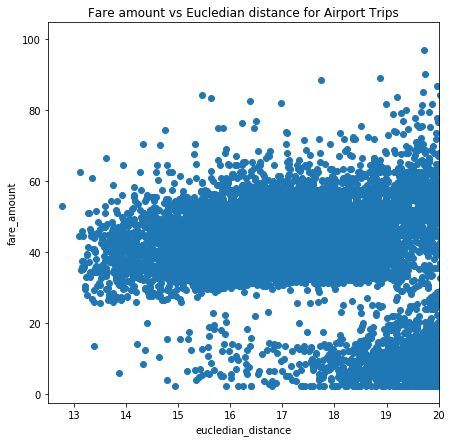

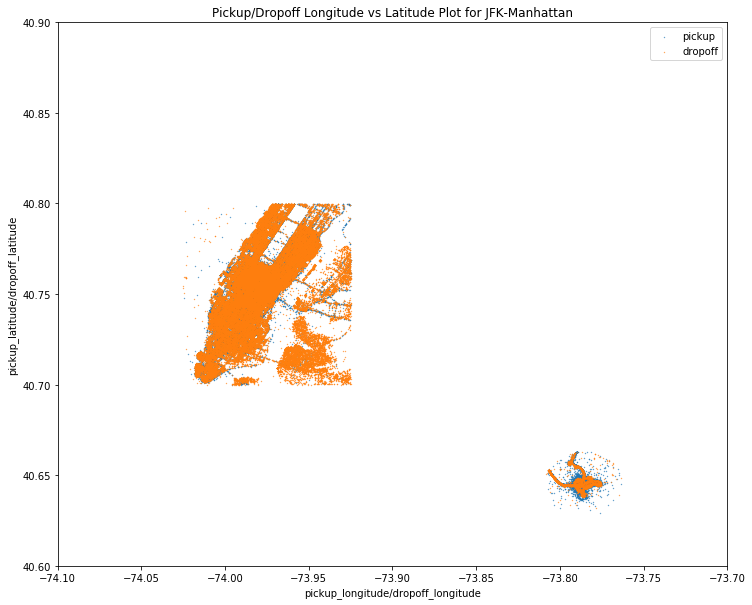

In [9]:
# Checks if the given lat lon is in Manhattan
def is_in_manhattan(lon, lat):
    BB = (-74.025, -73.925, 40.7, 40.8)
    
    return ((lon >= BB[0]) & (lon <= BB[1]) & (lat >= BB[2]) & (lat <= BB[3]))

# Checks if the given lat lon is in airport region.
# Currently, only considering JFK for the airport.
def is_near_airport(lon, lat):
    MAX_RADIUS = 2
    
    # JFK coordinates
    AIRPORT_COORDINATES = [(40.645112, -73.785524)]

    within_radius = False
    for t in AIRPORT_COORDINATES:
        within_radius = within_radius or (haversine_distance(lon, lat, t[1], t[0]) <= MAX_RADIUS)
        
    return within_radius

# Checks if the trip is an airport trip or not.
def is_airport_trip(x):
    return ((is_near_airport(x.dropoff_longitude, x.dropoff_latitude) \
                and is_in_manhattan(x.pickup_longitude, x.pickup_latitude))
            or (is_near_airport(x.pickup_longitude, x.pickup_latitude) \
                and is_in_manhattan(x.dropoff_longitude, x.dropoff_latitude)))

def airport_trips(df):    
    return df[df.apply(is_airport_trip, axis = 1)]

train_df_airport = airport_trips(train_df)

print("Total number of airport trips: %d" % len(train_df_airport))

print("\n-----------Visualizing airport trips------------\n")

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (7,7))
plt.xlim(12.5,20)
plt.xlabel('eucledian_distance')
plt.ylabel('fare_amount')
plt.title('Fare amount vs Eucledian distance for Airport Trips')
ax.scatter(train_df_airport['eucledian_distance'], train_df_airport['fare_amount'])
plt.show()

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
plt.xlabel('pickup_longitude/dropoff_longitude')
plt.ylabel('pickup_latitude/dropoff_latitude')
plt.title('Pickup/Dropoff Longitude vs Latitude Plot for JFK-Manhattan')
ax.scatter(train_df_airport['pickup_longitude'], train_df_airport['pickup_latitude'], s = 0.1, alpha = 1, label = 'pickup')
ax.scatter(train_df_airport['dropoff_longitude'], train_df_airport['dropoff_latitude'], s = 0.1, alpha = 1, label = 'dropoff')
ax.legend()
plt.show()

In [5]:
train_df.to_csv('cleaned-data.csv', index = False)

In [11]:
# Extracting training data from cleaned data

#train_df = pd.read_csv('cleaned-data.csv')
features = ['year', 'month', 'weekday', 'minute', 'eucledian_distance', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
            'abs_diff_latitude', 'abs_diff_longitude']
cols = ['fare_amount'] + features

train_df = train_df[cols]
train_df.to_csv('training-data.csv', columns = cols, index = False)

In [5]:
train_df = pd.read_csv('./training-data.csv')

# Splitting the dataset in test and validation with percentage: 75% and 25%
train_df, test_df = train_test_split(train_df, test_size = 0.25)

In [6]:
def test_model(regr, train_df, test_df):
    X = train_df.iloc[:, 1:]
    y = train_df.iloc[:, 0] 
    regr.fit(X, y)

    y_pred = regr.predict(X)
    err = sqrt(mean_squared_error(y, y_pred))
    
    print("Training Root Mean squared error: %.4f" % (err))

    # Validation Testing
    X_test = test_df.iloc[:, 1:]
    y_test = test_df.iloc[:, 0]   
    y_test_pred = regr.predict(X_test)

    test_err = sqrt(mean_squared_error(y_test, y_test_pred))
    print("Validation Root Mean squared error: %.4f" % (test_err))

In [7]:
# Training linear regression model
# Referred: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
l_regr = linear_model.LinearRegression(normalize = True, n_jobs = -1)
test_model(l_regr, train_df, test_df)

print('Coefficients: ' + (', '.join('{:.2f}'.format(coef) for coef in l_regr.coef_)))

Training Root Mean squared error: 4.7883
Validation Root Mean squared error: 4.7914
Coefficients: 0.52, 0.07, -0.04, 0.00, 4.25, 0.04, -17.34, 8.22, -12.19, 2.17, -239.39, -110.13


In [15]:
# Random Forest Regressor
# Referred: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf_regr = RandomForestRegressor(random_state=0, n_jobs = -1, n_estimators = 10, oob_score = True)
test_model(rf_regr, train_df, test_df)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training Root Mean squared error: 1.4523
Validation Root Mean squared error: 3.4367


In [15]:
# Kaggle Submission
features = ['year', 'month', 'weekday', 'minute', 'eucledian_distance', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
            'abs_diff_latitude', 'abs_diff_longitude']

final_test_df = pd.read_csv('./input/test.csv')
final_test_df = transform_data(final_test_df)

X_final_test = final_test_df[features]

y_final_test = l_regr.predict(X_final_test)

submission = pd.DataFrame(
    {'key': final_test_df.key, 'fare_amount': y_final_test},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)
print("Submission file generated")

Added eucledian distance feature. New size: 9914 Total Rows removed: 0
Added time related features. New size: 9914 Total Rows removed: 0
Added travel vector features. New size: 9914 Total Rows removed: 0
Submission file generated
